## Day 09

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv's
climate_df = pd.read_csv("climate_dashboard_base.csv")
seasonal_summary = pd.read_csv("climate_seasonal_summary.csv")
yearly_summary = pd.read_csv("climate_yearly_trend.csv")

In [3]:
climate_df.head()

,Year,Season,Temp_Range,Rain,Temp Max
0,1951.0,Winter,13.990001,0.0,28.530001
1,1951.0,Winter,14.370001,0.0,28.850000
2,1951.0,Winter,16.230000,0.0,30.660000
3,1951.0,Winter,15.780000,0.0,30.139999
4,1951.0,Winter,15.840000,0.0,29.180000


In [4]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26806 entries, 0 to 26805
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        26803 non-null  float64
 1   Season      26806 non-null  object 
 2   Temp_Range  26746 non-null  float64
 3   Rain        26806 non-null  float64
 4   Temp Max    26748 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.0+ MB


In [5]:
num = climate_df.select_dtypes(exclude=object)
num

,Year,Temp_Range,Rain,Temp Max
0,1951.0,13.990001,0.0,28.530001
1,1951.0,14.370001,0.0,28.850000
2,1951.0,16.230000,0.0,30.660000
3,1951.0,15.780000,0.0,30.139999
4,1951.0,15.840000,0.0,29.180000
...,...,...,...,...
26801,2024.0,7.700000,0.0,34.300000
26802,2024.0,9.300000,20.0,34.800000
26803,NaN,7.700000,18.0,33.100000
26804,NaN,4.200000,4.0,30.900000


- correlation analysis helps identify linear relationships between variables, detect redundancy,
  and understand which features may influence each other.

In [6]:
corr_matrix = num.corr()
corr_matrix

,Year,Temp_Range,Rain,Temp Max
Year,1.000000,-0.043134,0.077293,0.089328
Temp_Range,-0.043134,1.000000,-0.065081,0.428261
Rain,0.077293,-0.065081,1.000000,-0.037145
Temp Max,0.089328,0.428261,-0.037145,1.000000


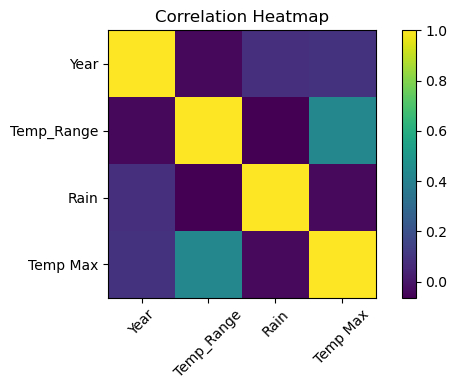

In [7]:
plt.figure(figsize=(6, 4))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**correlation heatmap**

- temparature-related features show mild correlation
- rainfall has weak correlation with most variables
- no extreme multicollinearity detected

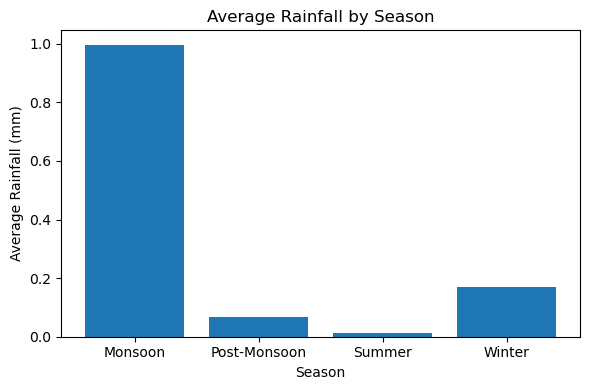

In [8]:
plt.figure(figsize=(6,4))
plt.bar(seasonal_summary['Season'], seasonal_summary['Rain'])
plt.title("Average Rainfall by Season")
plt.ylabel("Average Rainfall (mm)")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

this graph shows:

- monsoon rainfall dominates
- summer and post-monsoon are near-zero
- winter contributes marginal rainfall

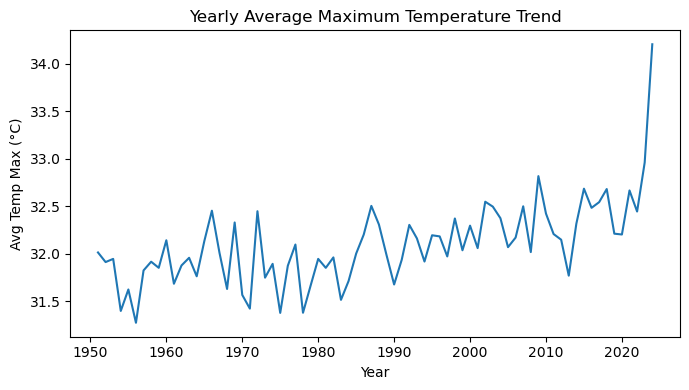

In [9]:
plt.figure(figsize=(7,4))
plt.plot(yearly_summary['Year'], yearly_summary['Temp Max'])
plt.title("Yearly Average Maximum Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Avg Temp Max (°C)")
plt.tight_layout()
plt.show()

this graph shows:

- gradual rise in avg maximum temp
- recent years show sharper increase
- short term flactuations around long-term trend

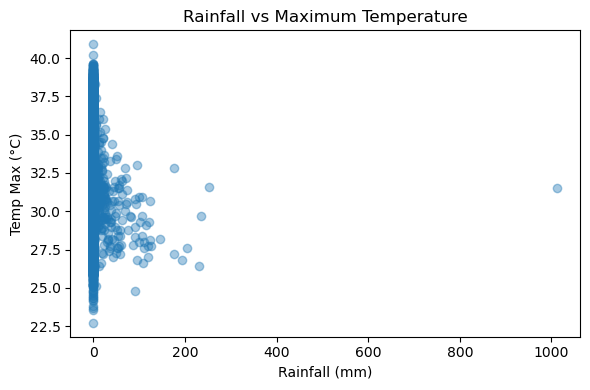

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(climate_df['Rain'], climate_df['Temp Max'], alpha=0.4)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Temp Max (°C)")
plt.title("Rainfall vs Maximum Temperature")
plt.tight_layout()
plt.show()

graph shows:

- High dispersion
- weak linear relationship
- no clear inverse pattern

In [11]:
corr_matrix.to_csv("climate_feature_correlations.csv")

Day 09 focused on understanding relationships between climatic variables using correlation analysis and comparative visualizations. Seasonal rainfall dominance and long-term temperature rise were validated using previously generated summaries. Weak linear relationships between rainfall and temperature suggest non-linear climate dynamics, setting the stage for advanced modeling and dashboard storytelling.